Решить задачу: классификации

на выборке: синтетической и https://archive.ics.uci.edu/ml/datasets/Breast+Cancer

с использованием моделей: логистической регрессии, нейронной сети, градиентного бустинга

со структурными параметрами: состав признаков, структура модели, количество параметров модели

критерии качества: ROC AUC, PR кривая, сложность модели (ввести опеределение)

In [89]:
import pandas as pd
import numpy as np

In [90]:
data = pd.read_csv("data/breast-cancer.csv", names = ["class", "age", "menopause", "tumor-size", "inv-nodes", 
                                                      "node-caps", "deg-malig", "breast", "breast-quad", 
                                                      "irradiat"])

In [91]:
y = data["class"]
X = data.drop(columns = ["class"])
X

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...
281,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,40-49,ge40,30-34,3-5,no,3,left,left_low,no


## Предобработка данных:

### 1. Обработка категориальных признаков.

Используем два разных способа кодирования категориальных признаков:

### 2. Нормализация данных.

Все признаки у нас категориальные, поэтому нормализация данных как минимум будет бесполезна, а как максимум вредна.


In [92]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)

X_prepro_ohe = encoder.fit_transform(X)
X_prepro_ohe.shape

(286, 43)

In [93]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

X_prepro_oe = encoder.fit_transform(X)
X_prepro_oe.shape

(286, 9)

In [94]:
target = []
for i in range(len(y)):
    if y[i] == "recurrence-events":
        target.append(0)
    else:
        target.append(1)
target = np.array(target)


In [95]:
print(target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Разделим выборку на тренировочную и тестовую 80/20

In [96]:
from sklearn.model_selection import train_test_split

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_prepro_ohe, target, test_size=0.2, random_state=42)
X_train_oe, X_test_oe, y_train_oe, y_test_oe = train_test_split(X_prepro_oe, target, test_size=0.2, random_state=42,)

In [97]:
y_train_ohe

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1])

Теперь у нас есть тренировочная и тестовая выборки

# Обучение моделей

## 1. Логистическая регрессия

1. ROC-AUC scores:
roc-auc score for ohe: 0.5682110682110683
roc-auc score for oe: 0.5308880308880309
2. PR curves:


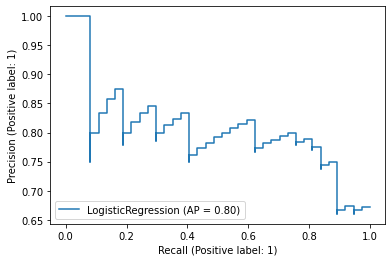

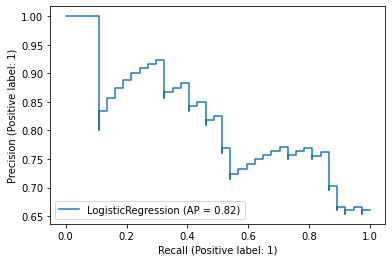

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

log_reg = LogisticRegression(penalty = "elasticnet",solver='saga',l1_ratio=0.4, max_iter = 1000)

log_reg.fit(X_train_ohe, y_train_ohe)
predicted_ohe = log_reg.predict(X_test_ohe)

print("1. ROC-AUC scores:")
print("roc-auc score for ohe: {}".format(roc_auc_score(y_test_ohe, predicted_ohe)))

disp = plot_precision_recall_curve(log_reg, X_test_ohe, y_test_ohe)

log_reg.fit(X_train_oe, y_train_oe)
predicted_oe = log_reg.predict(X_test_oe)

print("roc-auc score for oe: {}".format(roc_auc_score(y_test_oe, predicted_oe)))
print("2. PR curves:")
disp = plot_precision_recall_curve(log_reg, X_test_oe, y_test_oe)

## 2. Градиентный бустинг

1. ROC-AUC scores:
roc-auc score for ohe: 0.5482625482625483
1. ROC-AUC scores:
roc-auc score for oe: 0.6229086229086229


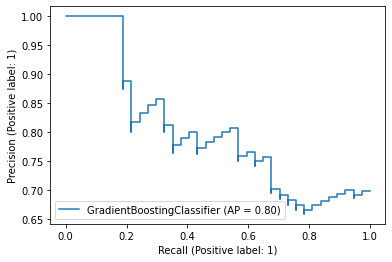

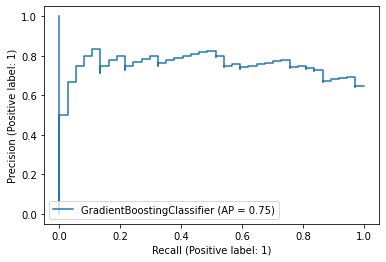

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

GB_clf = GradientBoostingClassifier(n_estimators = 1000)

GB_clf.fit(X_train_ohe, y_train_ohe)
predicted_ohe = GB_clf.predict(X_test_ohe)

print("1. ROC-AUC scores:")
print("roc-auc score for ohe: {}".format(roc_auc_score(y_test_ohe, predicted_ohe)))

disp = plot_precision_recall_curve(GB_clf, X_test_ohe, y_test_ohe)

GB_clf.fit(X_train_oe, y_train_oe)
predicted_oe = GB_clf.predict(X_test_oe)

print("1. ROC-AUC scores:")
print("roc-auc score for oe: {}".format(roc_auc_score(y_test_oe, predicted_oe)))

disp = plot_precision_recall_curve(GB_clf, X_test_oe, y_test_oe)

In [150]:
X_test_oe.shape

(58, 9)

## 3. Нейронная сеть 

In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequantial
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

ModuleNotFoundError: No module named 'tensorflow.python.platform'

In [ ]:
X_train_ohe_tensor = X_train_ohe.rehape(228, 43, 1)
X_test_ohe_tensor = X_test_ohe.reshape(58, 43, 1)

X_train_oe_tensor = X_train_oe.rehape(228, 9, 1)
X_test_oe_tensor = X_test_oe.reshape(58, 9, 1)

epochs = 50

model_oe = Sequential()
model_oe.add(Conv1D(filters = 32, kernel_size = 2, activation = "relu", input_shape = (9,1)))
model_oe.add(BatchNormalization())
model_oe.add(Dropout(0.2))

model_oe.add(Conv1D(filters = 64, kernel_size = 2, activation = "relu"))
model_oe.add(BatchNormalization())
model_oe.add(Dropout(0.5))

model_oe.add(Flatten())
model_oe.add(BatchNormalization())
model_oe.add(Dropout(0.5))

model_oe.add(Dense(1, activation = "sigmoid"))

model_ohe = Sequential()
model_ohe.add(Conv1D(filters = 32, kernel_size = 2, activation = "relu", input_shape = (43,1)))
model_ohe.add(BatchNormalization())
model_ohe.add(Dropout(0.2))

model_ohe.add(Conv1D(filters = 64, kernel_size = 2, activation = "relu"))
model_ohe.add(BatchNormalization())
model_ohe.add(Dropout(0.5))

model_ohe.add(Flatten())
model_ohe.add(BatchNormalization())
model_ohe.add(Dropout(0.5))

model_ohe.add(Dense(1, activation = "sigmoid"))